In [6]:
# listen for changes in code base
%load_ext autoreload
%autoreload 2

In [7]:
from turtle import color
from GeneticModels import  InitializationClass

from GeneticModels import  Population
from GeneticModels import  Individual

from GeneticModels import CrossoverAlgorithm
from GeneticModels import MutateAlgorithm

from GeneticModels import GeneticAlgorithm

import numpy as np
import matplotlib.pyplot as plt

from visuals import draw_function, draw_contour_and_solutions

In [49]:
'''
Problem statement :
    for the objective function f(x1, x2), find the minima
'''

def objective_function(x1,x2):
    # Booth function
    # f(1,3) = 0
    # reference : https://en.wikipedia.org/wiki/Test_functions_for_optimization
    return np.power((x1 + 2 * x2 - 7),2) + np.power((2*x1 + x2 - 5),2)

In [50]:
uniform_initalization = InitializationClass(low=-10,high=10,dimensions=2,init_type='uniform')

crossover_alg = CrossoverAlgorithm(crossover_type='interpolation', interpolation_coeff =0.01, crossover_probability = 0.9)
mutate_alg = MutateAlgorithm(mutate_type='gaussian', mutation_probability = 0.3)

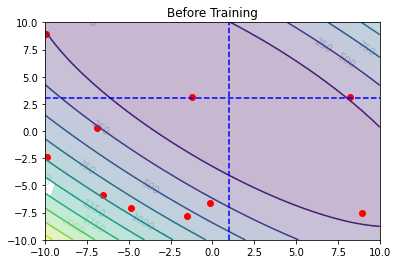

In [51]:
'''
Visual insight of the objective function
'''
lb = -10
ub = 10

population = Population(uniform_initalization, m = 10)
#print("Individuals : ")
#print(population.individuals)
draw_contour_and_solutions(objective_function, lb, ub, population.individuals, "Before Training")
plt.show(block = False)


### Training

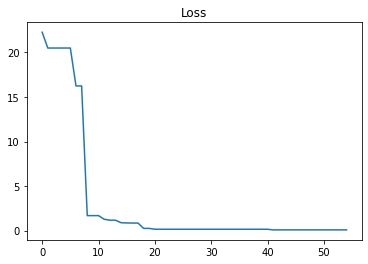

In [52]:
# parameters tuning
crossover_alg.interpolation_coeff = 0.1
crossover_alg.crossover_probability = 0.9
mutate_alg.mutation_probability = 0.2

genetic_algo = GeneticAlgorithm(objective_function, population, None,crossover_alg, mutate_alg)
losses = genetic_algo.fit(epochs = 55, verbose= False)
plt.figure()
plt.title("Loss")
plt.plot(losses)
plt.show(block = False)

#print("Individuals : ")
#print(genetic_algo.population.individuals)

### Assessment

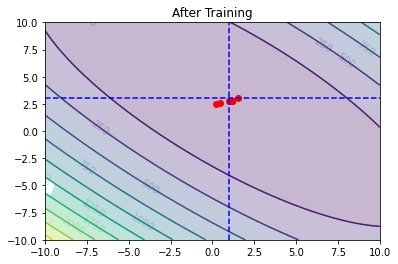

In [53]:
'''
Visual insight of predictions
'''
draw_contour_and_solutions(objective_function, lb, ub, genetic_algo.population.individuals, "After Training")
plt.show()


### Next Steps

Extend the modules
- Add different selection, cross-over (interpolation ?), mutation functions
